<a href="https://colab.research.google.com/github/ashish-ty/Image_Restoration/blob/main/Project_deblur_color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import cv2
import glob
import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [15]:
! pip install kaggle

In [16]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [17]:
! cp kaggle.json ~/.kaggle/

In [18]:
! chmod 600 ~/.kaggle/kaggle.json

In [19]:
! kaggle datasets download -d jessicali9530/lfw-dataset

 94% 106M/112M [00:04<00:00, 30.2MB/s] 
100% 112M/112M [00:04<00:00, 24.7MB/s]


In [ ]:
! unzip lfw-dataset.zip

In [21]:
face_images = glob.glob('/content/lfw-deepfunneled/lfw-deepfunneled/**/*.jpg') 

In [22]:
import pickle

images = np.zeros((len(face_images),120,120,3))

for i in range(len(face_images)):
  img = tf.keras.preprocessing.image.load_img(face_images[i], target_size=(120,120,3))
  img = tf.keras.preprocessing.image.img_to_array(img)
  images[i] = img

In [23]:
images = images/255.0

In [24]:
images.shape

(13233, 120, 120, 3)

In [25]:
#Splitting
import random

random_nums = random.sample(range(0,1000),100)
x_test = np.zeros((100,120,120,3))
x_train = np.zeros((900,120,120,3))


tt=0
tr=0

for i in range(0,1000):
  if i not in random_nums:
    x_train[tt] = images[i]
    tt = tt + 1
  else:
    x_test[tr] = images[i]
    tr = tr + 1


In [27]:
# noise_fact_val = 30/255

# x_train_noise = x_train + noise_fact_val*np.random.normal(loc=0, scale=1.0,size=x_train.shape)
# x_test_noise = x_test + noise_fact_val*np.random.normal(loc=0, scale=1.0,size=x_test.shape)

x_test_blur = np.zeros((100,120,120,3))
x_train_blur = np.zeros((900,120,120,3))

for i in range(0,900):
  x_train_blur[i]=cv2.GaussianBlur(x_train[i], (7, 7), 0)
x_test_blur=x_test
for i in range(0,100):
  x_test_blur[i]=cv2.GaussianBlur(x_test[i], (7, 7), 0)


In [34]:
model = models.Sequential()

model.add(layers.Conv2D(128, (9, 9), strides = 1, padding = 'same', activation='relu',input_shape=(120,120,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (7, 7), strides = 1, padding = 'same',activation='relu'))
model.add(layers.UpSampling2D())

model.add(layers.Conv2D(32, (5, 5), strides = 1, padding = 'same',activation='relu'))
model.add(layers.Conv2D(3, (3, 3), strides = 1, padding = 'same',activation='relu'))




model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 120, 120, 128)     31232     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 60, 60, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 64)        401472    
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 120, 120, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 120, 120, 32)      51232     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 120, 120, 3)       867       
Total params: 484,803
Trainable params: 484,803
Non-trainable params: 0
________________________________________________

In [35]:
model.compile(loss = 'mse', optimizer = 'adam',metrics=['accuracy'])

with tf.device('/device:GPU:0'):
    model.fit(x_train_blur.reshape(-1, 120, 120, 3), x_train.reshape(-1, 120, 120, 3), epochs = 500, batch_size = 128, 
              validation_data = (x_test_blur.reshape(-1, 120, 120, 3), x_test.reshape(-1, 120, 120, 3)))

Epoch 1/500
8/8 [==============================] - 6s 628ms/step - loss: 0.7057 - accuracy: 0.3924 - val_loss: 0.2018 - val_accuracy: 0.1776
Epoch 2/500
8/8 [==============================] - 5s 571ms/step - loss: 0.1672 - accuracy: 0.1902 - val_loss: 0.1036 - val_accuracy: 0.1747
Epoch 3/500
8/8 [==============================] - 5s 575ms/step - loss: 0.0777 - accuracy: 0.1459 - val_loss: 0.0171 - val_accuracy: 0.6290
Epoch 4/500
8/8 [==============================] - 5s 570ms/step - loss: 0.0262 - accuracy: 0.6027 - val_loss: 0.0168 - val_accuracy: 0.6084
Epoch 5/500
8/8 [==============================] - 5s 570ms/step - loss: 0.0243 - accuracy: 0.3179 - val_loss: 0.0145 - val_accuracy: 0.5608
Epoch 6/500
8/8 [==============================] - 5s 574ms/step - loss: 0.0200 - accuracy: 0.5567 - val_loss: 0.0115 - val_accuracy: 0.6052
Epoch 7/500
8/8 [==============================] - 5s 573ms/step - loss: 0.0167 - accuracy: 0.5212 - val_loss: 0.0101 - val_accuracy: 0.5999
Epoch 8/500
8

In [36]:

#utility function to pick samples to be tested
def get_samples(arr, n):
    temp = random.sample(range(len(arr)), n)
    result = arr[temp]
    return result, temp

In [37]:
num = 10
org, temp = get_samples(x_train, num)
blur = x_train_blur[temp]
preds = model.predict(blur)

Original Images


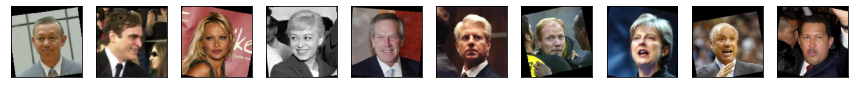

Images with blur


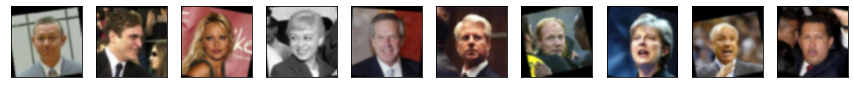

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted Images


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


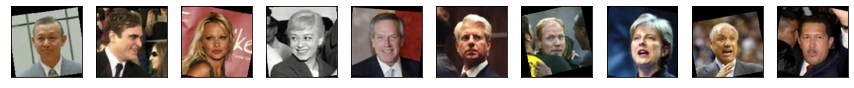

In [38]:
plt.figure(figsize = (15, 15))
print('Original Images')
for i in range(num):
    plt.subplot(1, num, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(org[i], cmap=plt.cm.binary)
plt.show()

plt.figure(figsize = (15, 15))
print('Images with blur')
for i in range(num):
    plt.subplot(1, num, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(blur[i], cmap=plt.cm.binary)
plt.show()

plt.figure(figsize = (15, 15))
print('Predicted Images')
for i in range(num):
    plt.subplot(1, num, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(preds[i], cmap=plt.cm.binary)
plt.show()

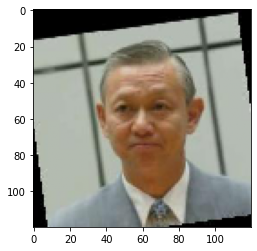

In [39]:
plt.imshow(x_train[temp[0]], cmap=plt.cm.binary)

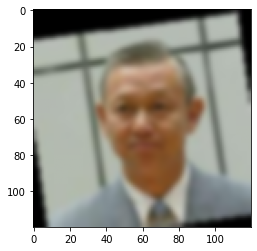

In [41]:
plt.imshow(x_train_blur[temp[0]], cmap=plt.cm.binary)

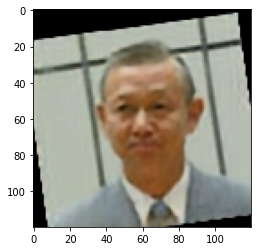

In [42]:
plt.imshow(preds[0], cmap=plt.cm.binary)

In [43]:
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets
